<a href="https://colab.research.google.com/github/Barbozah/ProcessamentoDeImagens/blob/master/ProjetoPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificador de valores em dados

### Carregamento de imagens e bibliotecas

In [0]:
!git clone https://github.com/Barbozah/PI_imgs.git

Cloning into 'PI_imgs'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25 (delta 2), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt

## Pré-processamento

In [0]:
dice1 = cv2.imread('PI_imgs/projeto/multi.jpg', 0)[20:,40:]
dice2 = cv2.imread('PI_imgs/projeto/dices001.jpeg', 0)

dice = dice1

### Redução de ruído

#### Convolução

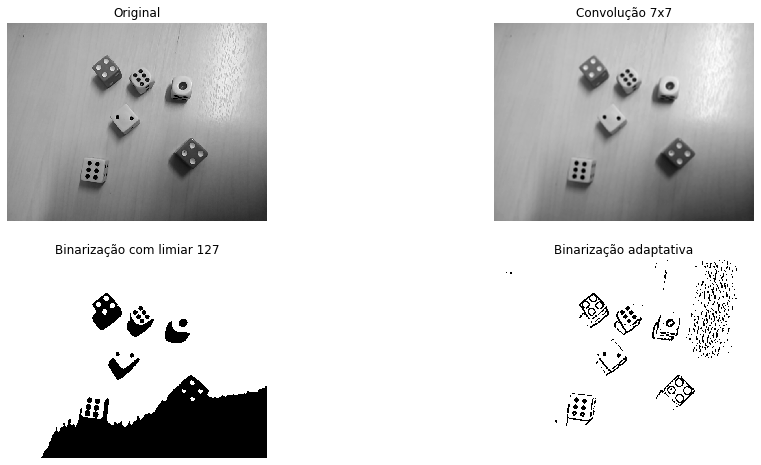

In [0]:
kernel = np.ones((7,7),np.float32)/49
conv = cv2.filter2D(dice,-1,kernel)

ret,thresh1 = cv2.threshold(conv, 127, 255, cv2.THRESH_BINARY)

thresh2 = cv2.adaptiveThreshold(conv,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                cv2.THRESH_BINARY,11,2)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(dice, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(conv, cmap='gray')
ax[1].set_title('Convolução 7x7')
ax[1].set_axis_off()

ax[2].imshow(thresh1, cmap='gray')
ax[2].set_title('Binarização com limiar 127')
ax[2].set_axis_off()

ax[3].imshow(thresh2, cmap='gray')
ax[3].set_title('Binarização adaptativa')
ax[3].set_axis_off()

#### Média

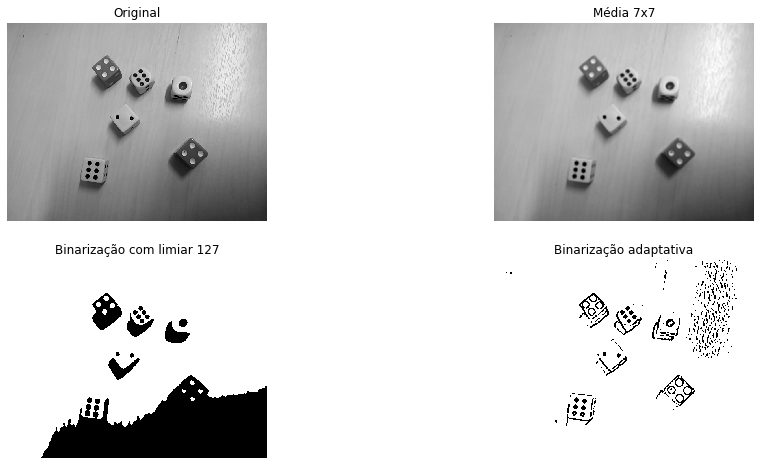

In [0]:
mean = cv2.blur(dice,(7,7))

ret,thresh1 = cv2.threshold(mean, 127, 255, cv2.THRESH_BINARY)

thresh2 = cv2.adaptiveThreshold(mean,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                cv2.THRESH_BINARY,11,2)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(dice, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(mean, cmap='gray')
ax[1].set_title('Média 7x7')
ax[1].set_axis_off()

ax[2].imshow(thresh1, cmap='gray')
ax[2].set_title('Binarização com limiar 127')
ax[2].set_axis_off()

ax[3].imshow(thresh2, cmap='gray')
ax[3].set_title('Binarização adaptativa')
ax[3].set_axis_off()

#### Mediana

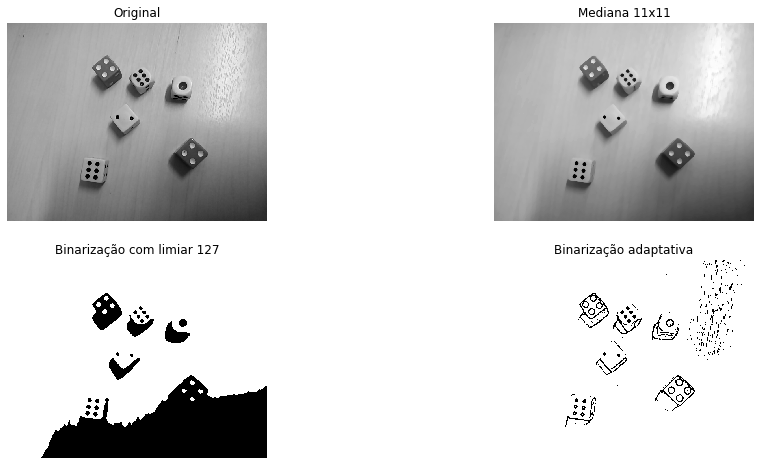

In [0]:
median = cv2.medianBlur(dice, 11)

ret,thresh1 = cv2.threshold(median, 127, 255, cv2.THRESH_BINARY)

thresh2 = cv2.adaptiveThreshold(median,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                cv2.THRESH_BINARY,11,2)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(dice, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(median, cmap='gray')
ax[1].set_title('Mediana 11x11')
ax[1].set_axis_off()

ax[2].imshow(thresh1, cmap='gray')
ax[2].set_title('Binarização com limiar 127')
ax[2].set_axis_off()

ax[3].imshow(thresh2, cmap='gray')
ax[3].set_title('Binarização adaptativa')
ax[3].set_axis_off()

#### Comparação

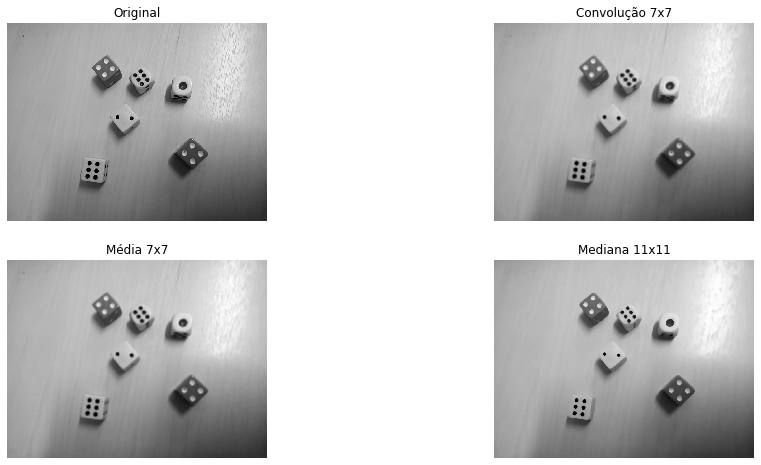

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(dice, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(conv, cmap='gray')
ax[1].set_title('Convolução 7x7')
ax[1].set_axis_off()

ax[2].imshow(mean, cmap='gray')
ax[2].set_title('Média 7x7')
ax[2].set_axis_off()

ax[3].imshow(median, cmap='gray')
ax[3].set_title('Mediana 11x11')
ax[3].set_axis_off()

### Detecção de bordas

#### Laplaciano

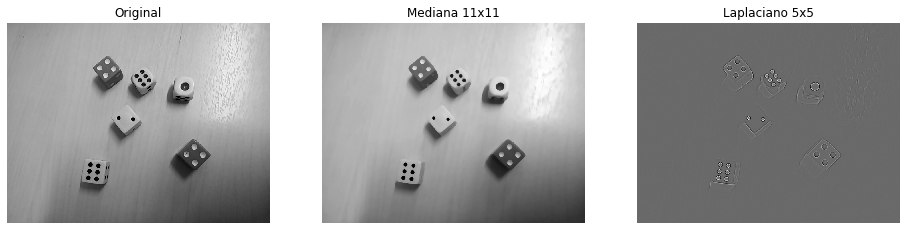

In [0]:
blur = cv2.medianBlur(dice, 11)
lapl = cv2.Laplacian(blur, cv2.CV_16S, ksize=5)

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(dice, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(blur, cmap='gray')
ax[1].set_title('Mediana 11x11')
ax[1].set_axis_off()

ax[2].imshow(lapl, cmap='gray')
ax[2].set_title('Laplaciano 5x5')
ax[2].set_axis_off()

#### Sobel

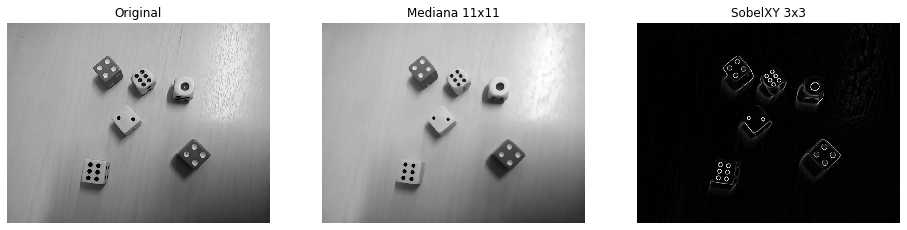

In [0]:
blur = cv2.medianBlur(dice, 11)

grad_x = cv2.Sobel(blur, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(blur, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

sobel = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(dice, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(blur, cmap='gray')
ax[1].set_title('Mediana 11x11')
ax[1].set_axis_off()

ax[2].imshow(sobel, cmap='gray')
ax[2].set_title('SobelXY 3x3')
ax[2].set_axis_off()

#### Canny

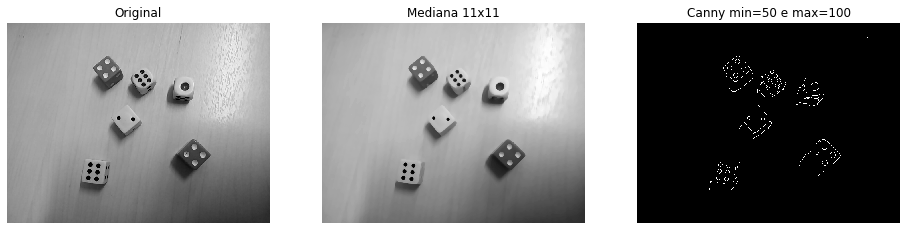

In [0]:
blur = cv2.medianBlur(dice, 11)

canny = cv2.Canny(blur, 50, 100)

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(dice, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(blur, cmap='gray')
ax[1].set_title('Mediana 11x11')
ax[1].set_axis_off()

ax[2].imshow(canny, cmap='gray')
ax[2].set_title('Canny min=50 e max=100')
ax[2].set_axis_off()

#### Comparação

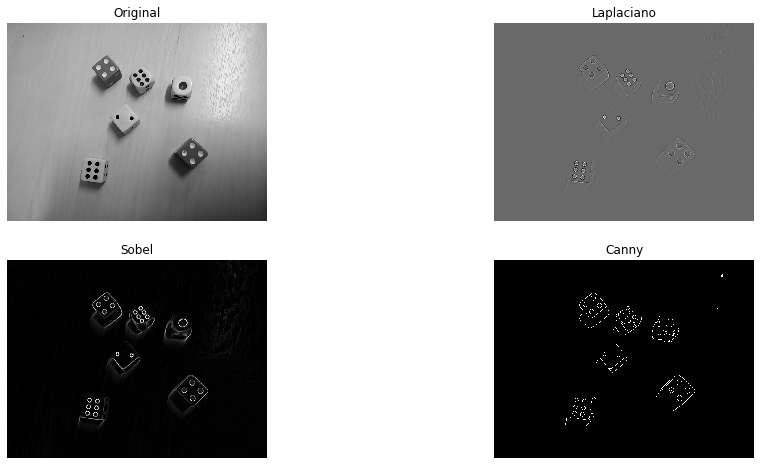

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(dice, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(lapl, cmap='gray')
ax[1].set_title('Laplaciano')
ax[1].set_axis_off()

ax[2].imshow(sobel, cmap='gray')
ax[2].set_title('Sobel')
ax[2].set_axis_off()

ax[3].imshow(canny, cmap='gray')
ax[3].set_title('Canny')
ax[3].set_axis_off()

### Filtro mediana (Passa-baixa) e BlobDetector

Explicar o porque do filtro mediana e do blobDetector

In [0]:
def detect_keypoints(img, blur=11):
    
    # filtro mediana
    median = cv2.medianBlur(img, blur)
    
    gray = cv2.cvtColor(median, cv2.COLOR_BGR2GRAY)
    
    # blob detector
    detector = cv2.SimpleBlobDetector_create()
    
    # detecta pontos com circulos brancos, pretos (ou coloridos)
    return detector.detect(gray) + detector.detect(255-gray)

def apply_keypoints(img, keypoints=None, color=(0,0,255)):
    if not keypoints:
        keypoints=detect_keypoints(img)
    return cv2.drawKeypoints(img, keypoints, np.array([]), color, 
                             cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

### Dado isolado

Excelente resultado na segmentação de dado único

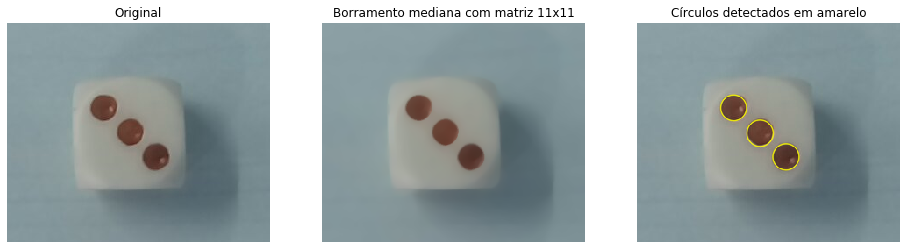

In [0]:
single = cv2.imread('PI_imgs/projeto/single.jpg')[200:450, 300:600]

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(single)
ax[0].set_title('Original')
ax[0].set_axis_off()

blur_single = cv2.medianBlur(single, 11)

ax[1].imshow(blur_single)
ax[1].set_title('Borramento mediana com matriz 11x11')
ax[1].set_axis_off()

ax[2].imshow(apply_keypoints(single, color=(255, 255, 0)))
ax[2].set_title('Círculos detectados em amarelo')
ax[2].set_axis_off()

### Vários dados

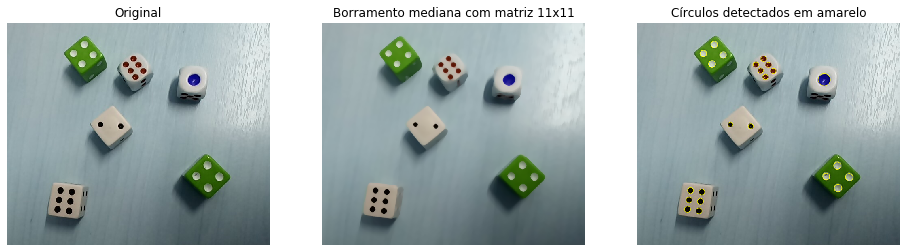

In [0]:
multi = cv2.imread('PI_imgs/projeto/multi.jpg')[100:650, 200:850]

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(multi)
ax[0].set_title('Original')
ax[0].set_axis_off()

blur_multi = cv2.medianBlur(multi, 11)

ax[1].imshow(blur_multi)
ax[1].set_title('Borramento mediana com matriz 11x11')
ax[1].set_axis_off()

ax[2].imshow(apply_keypoints(multi, color=(255, 255, 0)))
ax[2].set_title('Círculos detectados em amarelo')
ax[2].set_axis_off()

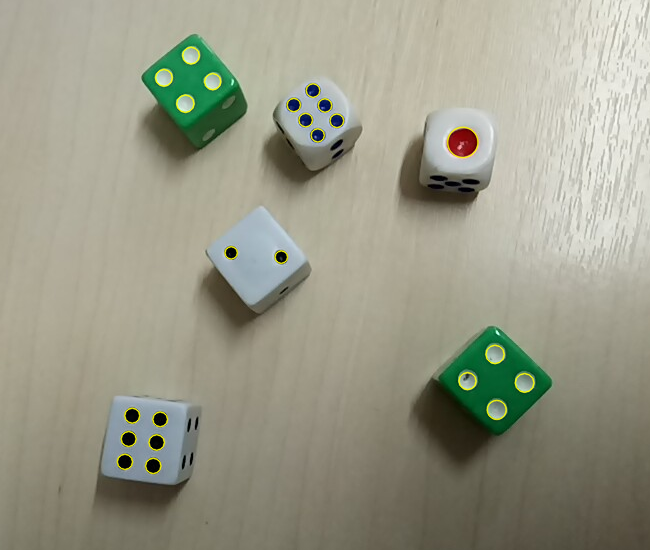

In [0]:
cv2_imshow(apply_keypoints(multi, color=(0, 255, 255)))

## Agrupamento por kmeans

In [0]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

def kmeans_agroup(points, n_clusters=6, max_iter=5, n_init=5, random_state=0):
  kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=5, n_init=5, random_state=0)
  pred = kmeans.fit_predict(points)
  centers = kmeans.cluster_centers_
  return pred, centers

### Resultado kmeans

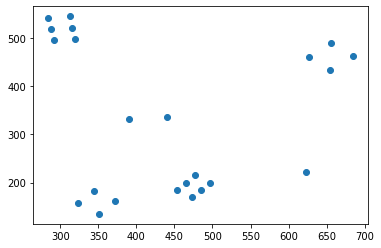

In [0]:
img = cv2.imread('PI_imgs/projeto/multi.jpg')[20:,40:]
points = [list(k.pt) for k in detect_keypoints(img)]
radius = [k.size for k in detect_keypoints(img)]
pointsT = np.transpose(points)

predict, centers = kmeans_agroup(points)

plt.scatter(pointsT[0], pointsT[1])
plt.show()

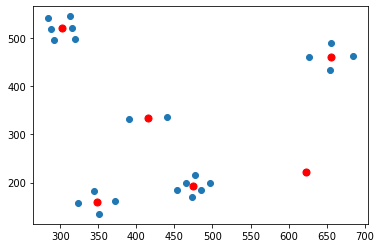

In [0]:
plt.scatter(pointsT[0], pointsT[1])
plt.scatter(centers[:, 0], centers[:, 1], s=50, c='red')
plt.show()

### Valores na imagem original

In [0]:
def format_groups(points, pred):
  l=-1
  group = []
  for index, value in enumerate(sorted(list(zip(points, pred)), key=lambda x: x[1])):
    i, k = value
    if k == l:
      group[k].append(i)
    else:
      l = k
      group.append([i])
  return list(zip(centers, group))

colors = [[240,0,0],[0,240,0],[0,0,240],[240,240,0],[240,0,240],[0,240,240]]

def plot_values(img, group, message='Valor: {}', color=(0, 255, 0)):
  im = img.copy()
  for c, p in group:
    font = cv2.FONT_HERSHEY_SIMPLEX
    point = int(c[0]), int(c[1])
    if type(color) == list:
      c = color[len(p)-1]
    else:
      c = color
    im = cv2.putText(im, message.format(len(p)), point, font, 1, c, 2, cv2.LINE_AA)
  return im

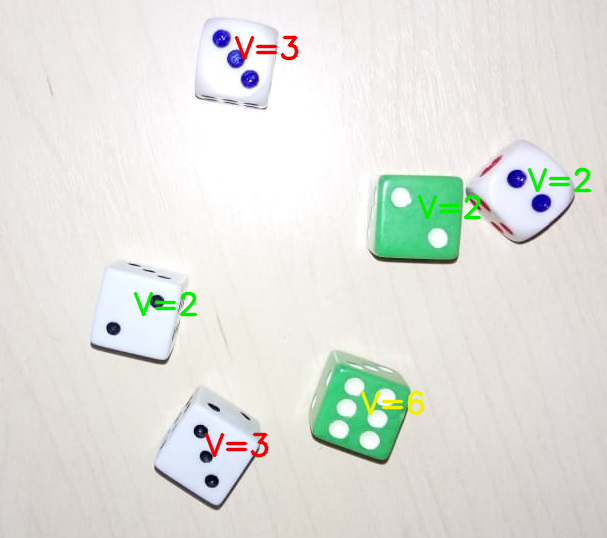

In [0]:
img = cv2.imread('PI_imgs/projeto/dices001.jpeg')
points = [list(k.pt) for k in detect_keypoints(img, 13)]
predict, centers = kmeans_agroup(points)

form = format_groups(points, predict)

img_final = plot_values(img, form, color=colors, message='V={}')

cv2_imshow(img_final)

## Aplicação de Regiões

In [0]:
def minkowski_distance(p1, p2, p=4):
    return ( abs(p1[0]-p2[0])**p + abs(p1[1]-p2[1])**p )**(1/p)

def closer(el, nodes, distance):
    c = (float('inf'), float('inf'))
    for i in nodes:
        if float(distance(i, el).real) < float(distance(c, el).real):
            c = i
    return c

import progressbar

def grow_with_progress(img, dices, colors, distance):
    new_img = img.copy()
    widgets=[
      '[', progressbar.Timer(), '] ',
      progressbar.Bar(),
      ' (', progressbar.ETA(), ') ',
    ]
    for i in progressbar.progressbar(range(len(img)), widgets=widgets):
      for j in range(len(img[i])):
        if sum(img[i][j]) == 0:
          coords = map(lambda x: (x[0]+10, x[1]+10), list(dices.keys()))
          c = closer((j,i), coords, distance)
          c = (c[0]-10, c[1]-10)
          new_img[i][j] = colors[dices[c]-1]
    return new_img

def format_dices(points, predict, colors):
  return {k:tuple(v, color[v]) for k,v in zip([tuple(c) for c in points], predict)}

In [0]:
img = cv2.imread('PI_imgs/projeto/dices001.jpeg')
points = [list(k.pt) for k in detect_keypoints(img, 13)]
predict, centers = kmeans_agroup(points)
form = format_groups(points, predict)
dices = {tuple(g[0]): len(g[1]) for g in form}

output = grow_with_progress(np.zeros(img.shape), dices, colors, minkowski_distance)

[Elapsed Time: 0:00:13] |###################################| (Time:  0:00:13) 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


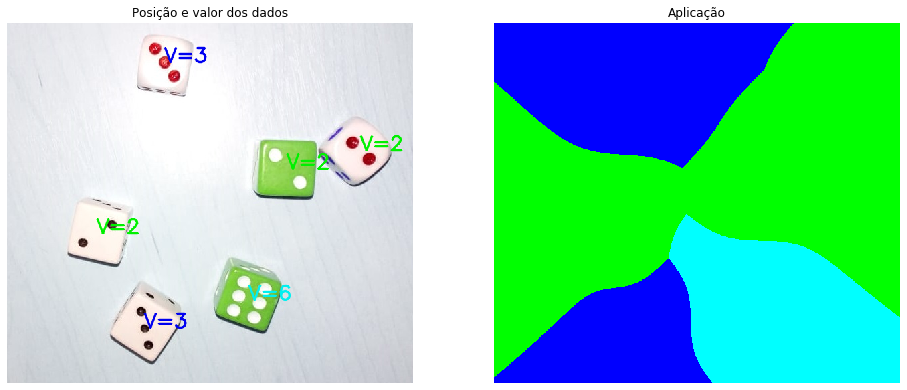

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(img_final)
ax[0].set_title('Posição e valor dos dados')
ax[0].set_axis_off()

ax[1].imshow(output)
ax[1].set_title('Aplicação')
ax[1].set_axis_off()